# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
import seaborn as sn

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [16]:
#What does each column mean?
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [17]:
#Any categorical data to convert?: No

In [15]:
customers.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


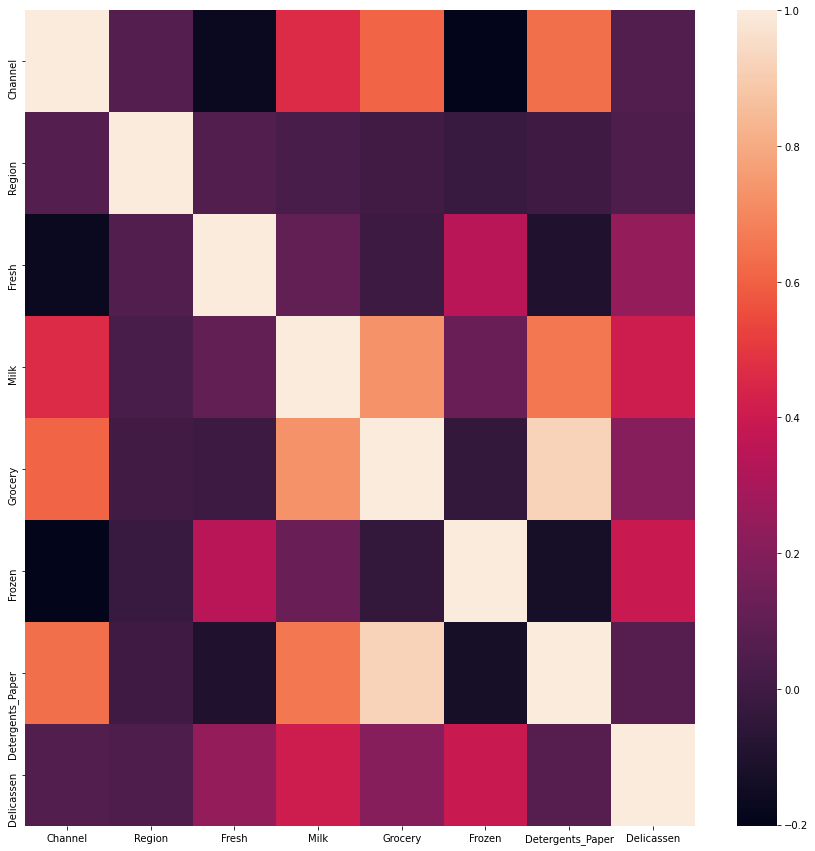

In [14]:
# Your code here:

plt.rcParams['figure.figsize']=(15, 15)
sn.heatmap(customers.corr());

In [19]:
#Column collinearity - any high correlations?: yes. Grocery seems highly correlated with Detergents_Paper. Let's remove the last:

In [20]:
customers = customers.drop(columns = ['Detergents_Paper'], axis = 1)

In [21]:
# Descriptive statistics - any outliers to remove?

In [25]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,47943.000000


In [75]:
customers.Region.unique()

array([3, 1, 2], dtype=int64)

## Fresh

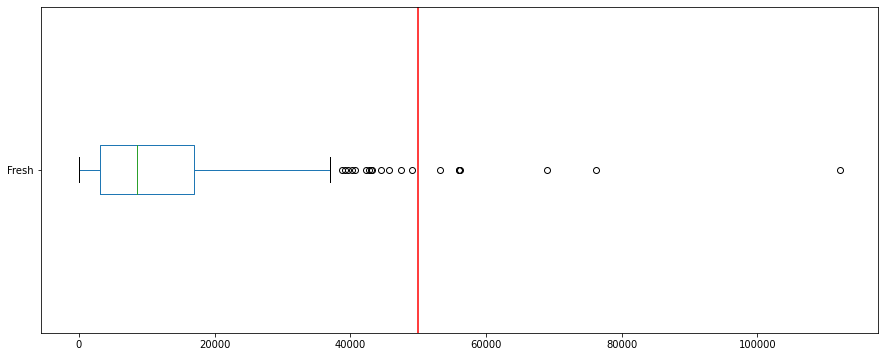

In [37]:
customers.Fresh.plot.box(vert = False, figsize=(15, 6));
plt.axvline(50000, color='r');

## Milk

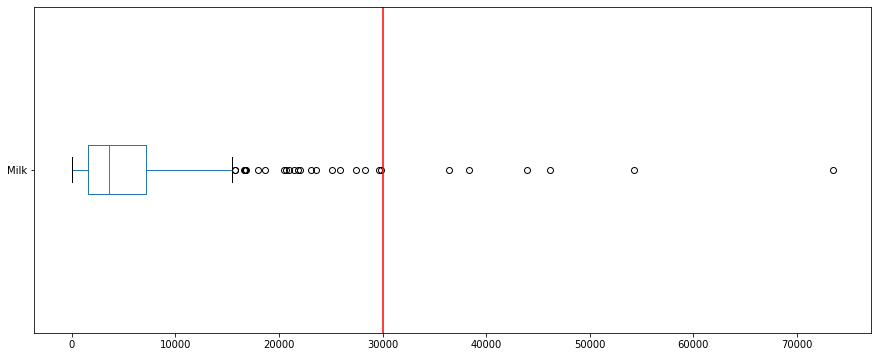

In [38]:
customers.Milk.plot.box(vert = False, figsize=(15, 6));
plt.axvline(30000, color='r');

## Grocery

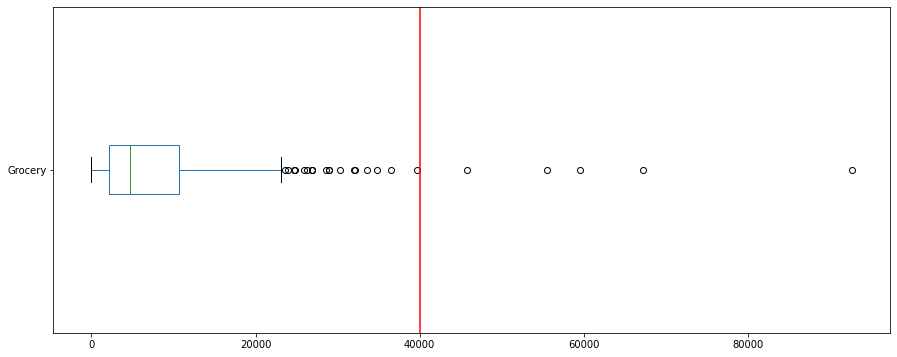

In [41]:
customers.Grocery.plot.box(vert = False, figsize=(15, 6));
plt.axvline(40000, color='r');

## Frozen

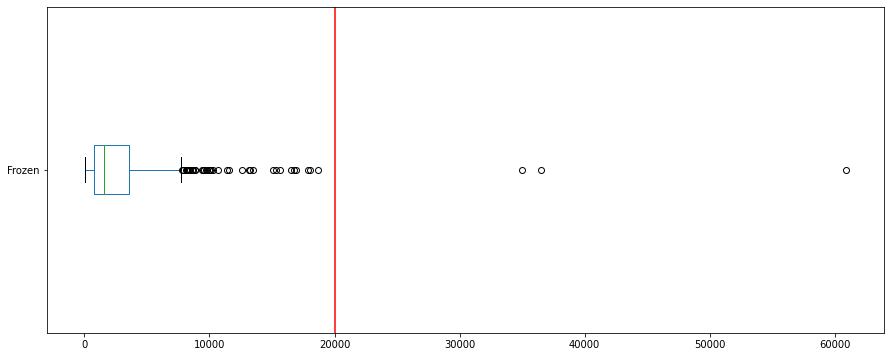

In [42]:
customers.Frozen.plot.box(vert = False, figsize=(15, 6));
plt.axvline(20000, color='r');

## Delicassen

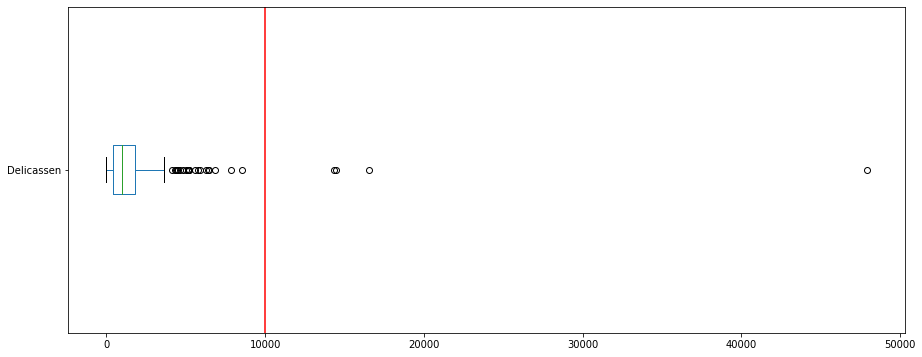

In [43]:
customers.Delicassen.plot.box(vert = False, figsize=(15, 6));
plt.axvline(10000, color='r');

In [99]:
customers['total'] = customers.Fresh + customers.Milk + customers.Grocery + customers.Frozen + customers.Delicassen

In [116]:
print('Fresh:',round(customers.Fresh.sum()/ customers.total.sum(),3),
     '\nMilk:',round(customers.Milk.sum()/ customers.total.sum(),3),
     '\nGrocery:',round(customers.Grocery.sum()/ customers.total.sum(),3),
     '\nFrozen:', round(customers.Frozen.sum()/ customers.total.sum(),3),
     '\nDelicassen:',round(customers.Delicassen.sum()/ customers.total.sum(),3))

Fresh: 0.395 
Milk: 0.191 
Grocery: 0.262 
Frozen: 0.101 
Delicassen: 0.05


In [135]:
pareto = customers.total.sort_values(ascending = False)
pareto = pd.DataFrame(pareto)
pareto['percent'] = pareto['total']/pareto['total'].sum()
pareto['acum'] = pareto['percent'].cumsum()
print('Number of customers which retail sales represent over 80% of the total:', 
      pareto[(pareto.acum > 0.8)].value_counts().sum(), '\nis more than 20% of the total customers:',
      len(customers)*0.2, "\nHence, I'd say data doesn't follow Pareto's rule")

Number of customers which retail sales represent over 80% of the total: 186 
is more than 20% of the total customers: 88.0 
Hence, I'd say data doesn't follow Pareto's rule


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [44]:
customers_clean = customers[(customers.Fresh < 50000) & (customers.Milk < 30000) & 
                            (customers.Grocery < 40000) & (customers.Frozen < 20000) & 
                            (customers.Delicassen < 10000)]

In [46]:
len(customers_clean)/len(customers)

0.9568181818181818

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [73]:
from sklearn.preprocessing import StandardScaler

In [72]:
customers_clean['Fresh_n'] = StandardScaler().fit_transform(customers_clean.Fresh.values.reshape(-1, 1))
customers_clean['Milk_n'] = StandardScaler().fit_transform(customers_clean.Milk.values.reshape(-1, 1))
customers_clean['Grocery_n'] = StandardScaler().fit_transform(customers_clean.Grocery.values.reshape(-1, 1))
customers_clean['Frozen_n'] = StandardScaler().fit_transform(customers_clean.Frozen.values.reshape(-1, 1))
customers_clean['Delicassen_n'] = StandardScaler().fit_transform(customers_clean.Delicassen.values.reshape(-1, 1))

<ipython-input-72-7d4a1fd47a8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_clean['Fresh_n'] = StandardScaler().fit_transform(customers_clean.Fresh.values.reshape(-1, 1))
<ipython-input-72-7d4a1fd47a8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_clean['Milk_n'] = StandardScaler().fit_transform(customers_clean.Milk.values.reshape(-1, 1))
<ipython-input-72-7d4a1fd47a8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [76]:
customers_scale = customers_clean.drop(columns =['Channel','Region','Fresh', 
                                                 'Milk', 'Grocery', 'Frozen', 'Delicassen'], axis = 1)

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [138]:
# Your code here:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)

labels = ['A', 'B', 'C', 'D']

clusters = kmeans.fit(customers_scale[customers_scale.columns])
clusters

KMeans(n_clusters=4)

Count the values in `labels`.

In [153]:
# Your code here:
predictions_K = clusters.fit_predict(customers_scale[customers_scale.columns])
print('clusters:', set(predictions_K), '\nnumber:',len(set(predictions_K)))

clusters: {0, 1, 2, 3} 
number: 4


In [149]:
customers_clean['labels_K'] = predictions

<ipython-input-149-047732d66c78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_clean['labels_K'] = predictions


# Challenge 4 - Data Clustering with AgglomerativeClustering

Now let's cluster the data using AgglomerativeClustering. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_AC']`. Now your original data have two labels, one from K-Means and the other from AgglomerativeClustering.

In [148]:
from sklearn.cluster import AgglomerativeClustering as AC

In [198]:
# Your code here


cluster_1=AC().fit(customers_scale)
cluster_2=AC(linkage = 'complete').fit(customers_scale)
cluster_3=AC(linkage = 'average').fit(customers_scale)

In [199]:
predictions_AC1 = cluster_1.fit_predict(customers_scale[customers_scale.columns])
predictions_AC2 = cluster_2.fit_predict(customers_scale[customers_scale.columns])
predictions_AC3 = cluster_3.fit_predict(customers_scale[customers_scale.columns])

Count the values in `labels_AC`.

In [200]:
# Your code here
print('cluster_AC1:', len(set(predictions_AC1)), 
      '\ncluster_AC2:', len(set(predictions_AC2)),
      '\ncluster_AC3:', len(set(predictions_AC3)))

cluster_AC1: 2 
cluster_AC2: 2 
cluster_AC3: 2


In [201]:
customers_clean['labels_AC1'] = predictions_AC1
customers_clean['labels_AC2'] = predictions_AC2
customers_clean['labels_AC3'] = predictions_AC3

<ipython-input-201-ff3c323de937>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_clean['labels_AC1'] = predictions_AC1
<ipython-input-201-ff3c323de937>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_clean['labels_AC2'] = predictions_AC2
<ipython-input-201-ff3c323de937>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

# Challenge 5 - Compare K-Means with AgglomerativeClustering

Now we want to visually compare how K-Means and AgglomerativeClustering have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_AC`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_AC` respectively

# Kmeans (4)

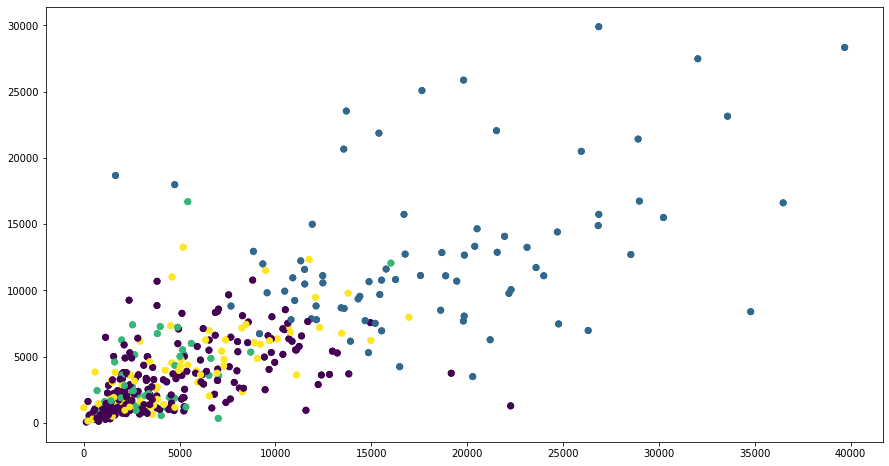

In [193]:
# Your code here:
plt.scatter(x = customers_clean.Grocery, y = customers_clean.Milk, c=clusters.labels_);

# AC (criteria = single)

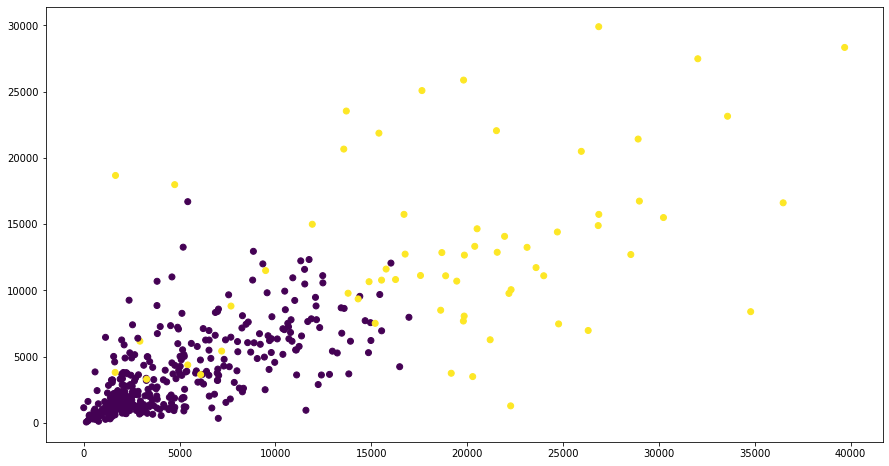

In [202]:
plt.scatter(customers_clean.Grocery, customers_clean.Milk, c=cluster_1.labels_);

# AC (criteria = complete)

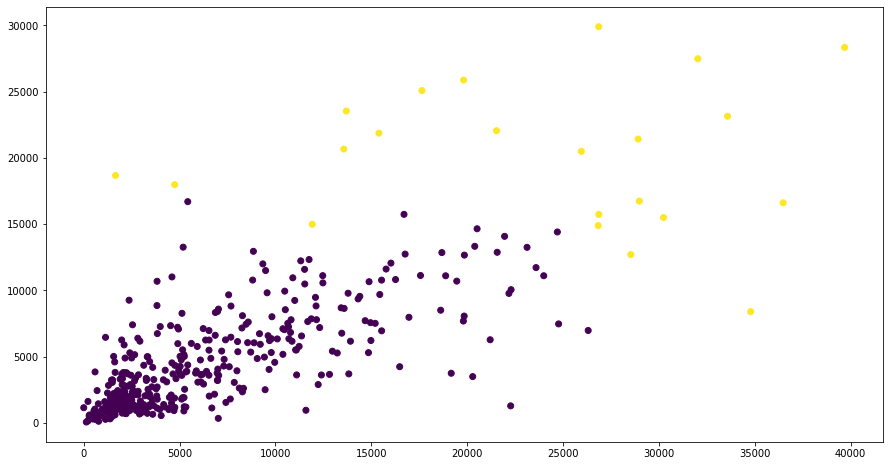

In [203]:
plt.scatter(customers_clean.Grocery, customers_clean.Milk, c=cluster_2.labels_);

# AC (criteria = average)

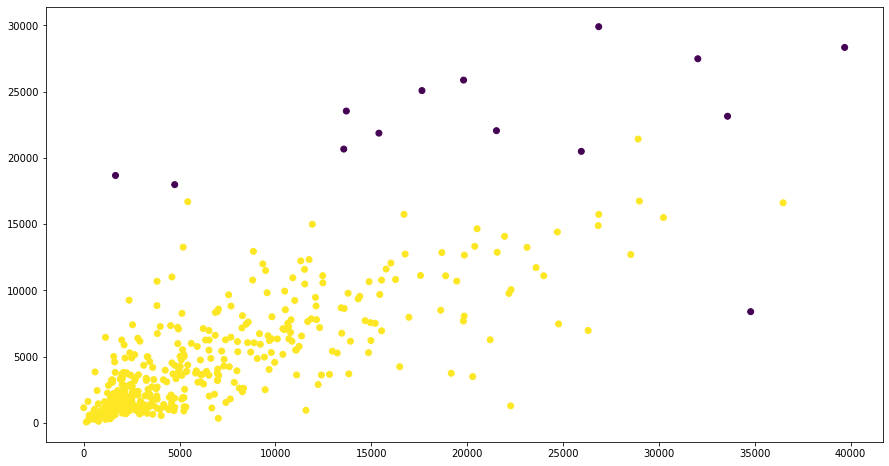

In [204]:
plt.scatter(customers_clean.Grocery, customers_clean.Milk, c=cluster_3.labels_);

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_AC` respectively

# Kmean (= 4)

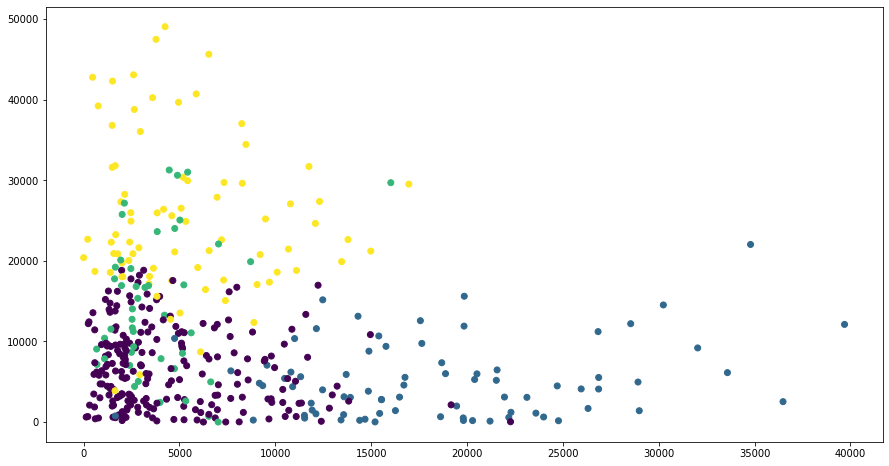

In [205]:
# Your code here:

plt.scatter(x = customers_clean.Grocery, y = customers_clean.Fresh, c=clusters.labels_);

# AC (criteria = single)

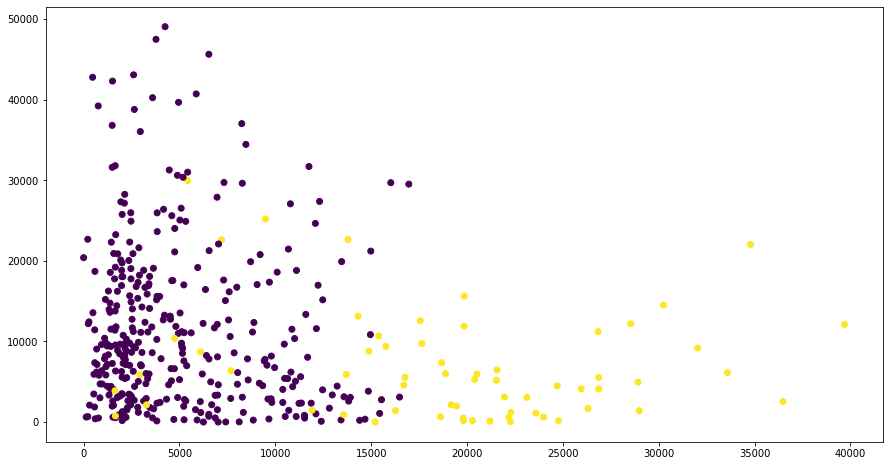

In [206]:
plt.scatter(customers_clean.Grocery, customers_clean.Fresh, c=cluster_1.labels_);

# AC (criteria = complete)

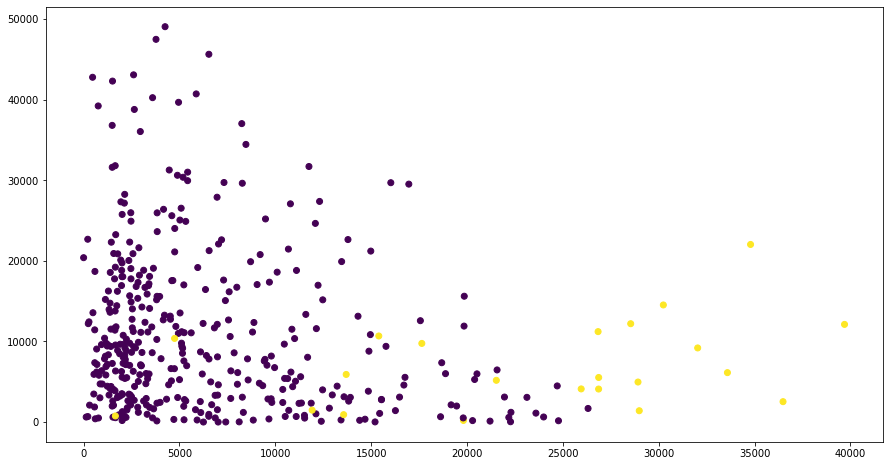

In [207]:
plt.scatter(customers_clean.Grocery, customers_clean.Fresh, c=cluster_2.labels_);

# AC (criteria = average)

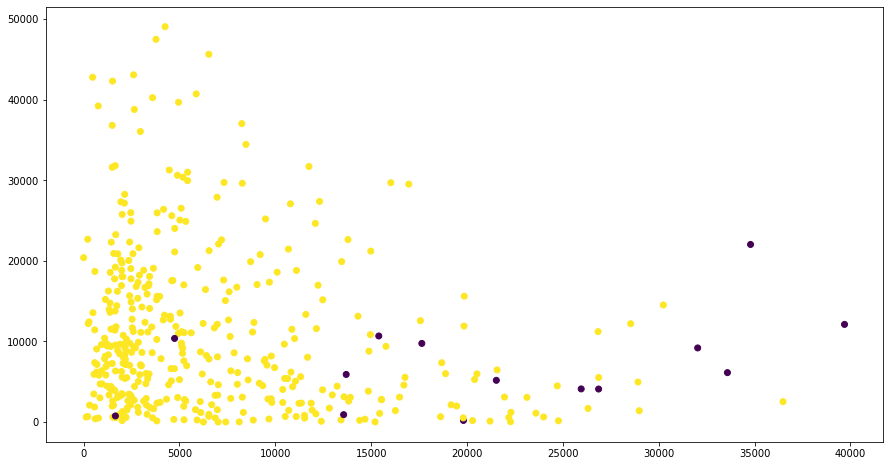

In [208]:
plt.scatter(customers_clean.Grocery, customers_clean.Fresh, c=cluster_3.labels_);

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_AC` respectively

# KMeans ( = 4)

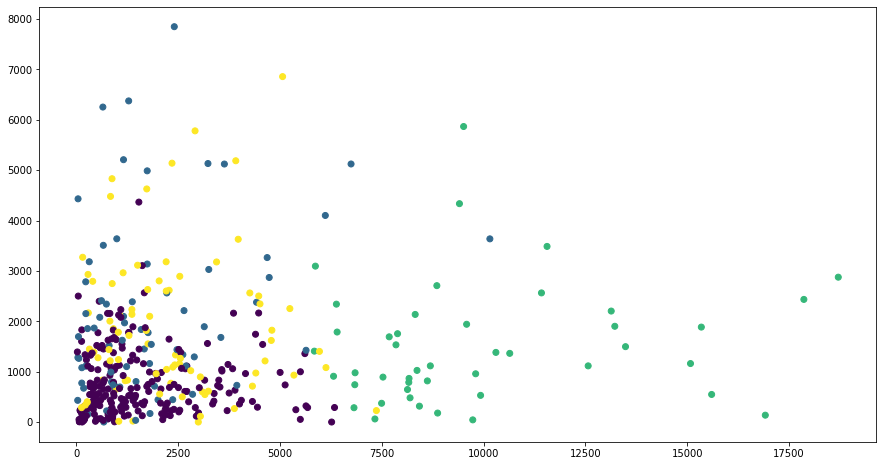

In [209]:
plt.scatter(x = customers_clean.Frozen, y = customers_clean.Delicassen, c=clusters.labels_);

# AC (criteria = single)

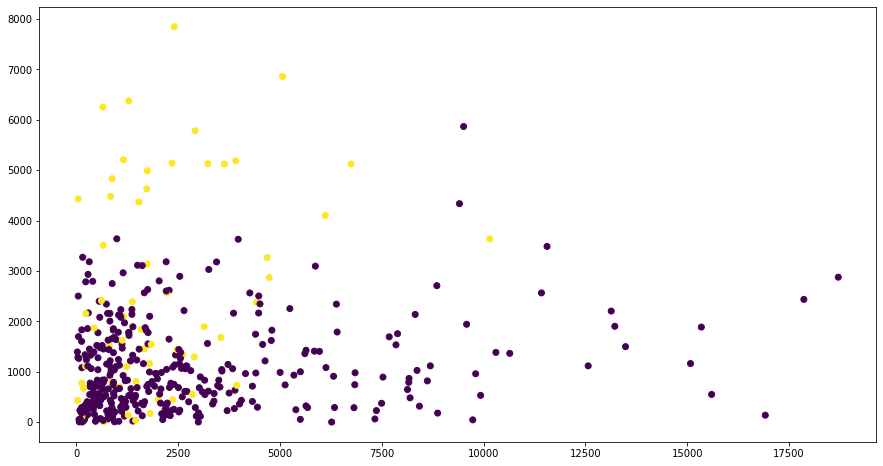

In [210]:
plt.scatter(customers_clean.Frozen, customers_clean.Delicassen, c=cluster_1.labels_);

# AC (criteria = complete)

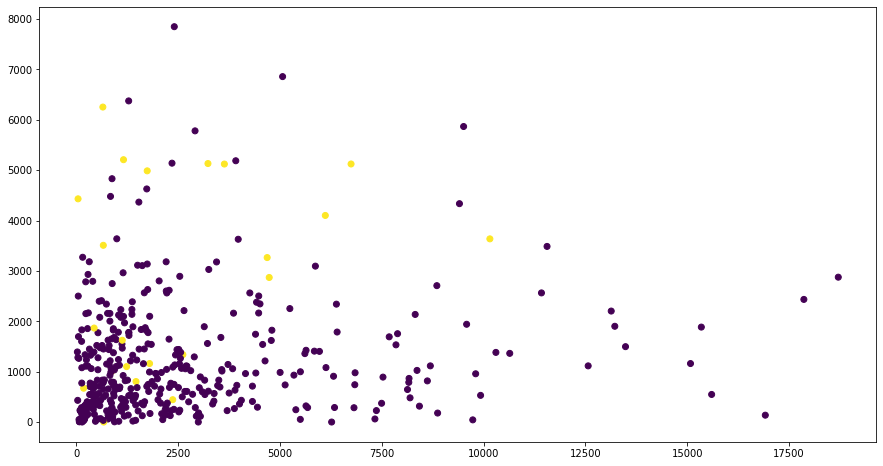

In [211]:
plt.scatter(customers_clean.Frozen, customers_clean.Delicassen, c=cluster_2.labels_);

# AC (criteria = average)

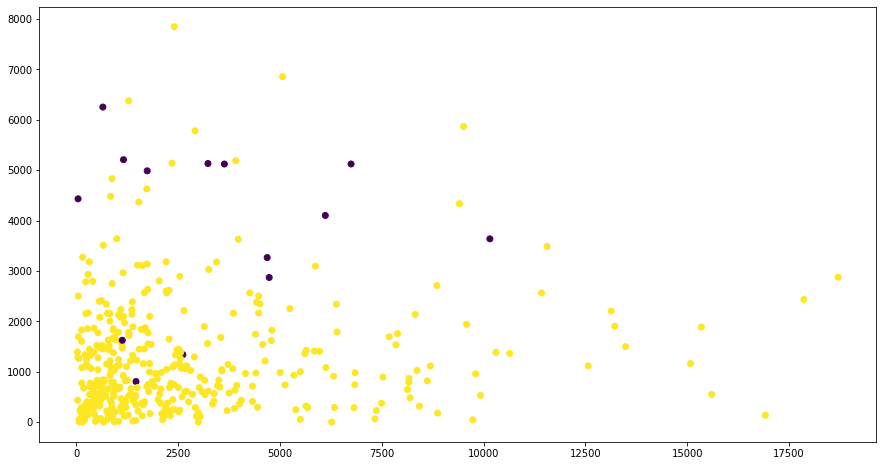

In [212]:
plt.scatter(customers_clean.Frozen, customers_clean.Delicassen, c=cluster_3.labels_);

In [ ]:
# Your code here:

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_AC` respectively and compute the means for all columns.

In [235]:
# Your code here:
customers_clean.groupby('labels_K').mean()[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen']]

,Fresh,Milk,Grocery,Frozen,Delicassen
labels_K,,,,,
0,6694.027273,3042.613636,4454.863636,1568.777273,787.522727
1,25572.623377,4121.194805,5396.961039,2323.974026,1817.857143
2,5128.141026,12798.525641,18340.628205,1738.192308,1951.538462
3,14403.978261,3684.195652,3804.456522,9784.521739,1467.456522


Which algorithm appears to perform better?

In [234]:
customers_clean.groupby('labels_AC1').mean()[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen']]

,Fresh,Milk,Grocery,Frozen,Delicassen
labels_AC1,,,,,
0,11405.181564,3714.536313,4992.438547,2741.156425,1049.921788
1,6687.317460,13089.857143,19268.523810,2038.253968,2493.349206


In [233]:
customers_clean.groupby('labels_AC2').mean()[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen']]

,Fresh,Milk,Grocery,Frozen,Delicassen
labels_AC2,,,,,
0,10899.731830,4292.248120,6219.062657,2640.152882,1176.182957
1,7061.954545,20084.454545,23627.454545,2560.136364,2893.454545


In [232]:
customers_clean.groupby('labels_AC3').mean()[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen']]

,Fresh,Milk,Grocery,Frozen,Delicassen
labels_AC3,,,,,
0,7249.214286,22381.714286,21499.642857,3436.000000,3848.857143
1,10817.855037,4523.638821,6634.434889,2608.452088,1177.073710


In [236]:
# Your observations here:
#It doesn't seem to be an homogeneity thourghout the rankings, ie, for cluster 1 would be the most valued for all 
#(or the majority) of the categories, except for the labels_AC3 where it seems to be the "fitter" one for this criteria

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with AgglomerativeClustering because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [222]:
# Your code here

kmeans = KMeans(n_clusters=2)

clusters2 = kmeans.fit(customers_scale[customers_scale.columns])
predictions_K2 = clusters2.fit_predict(customers_scale[customers_scale.columns])
print('clusters:', set(predictions_K2), '\nnumber:',len(set(predictions_K2)))
customers_clean['labels_K2'] = predictions_K2

clusters: {0, 1} 
number: 2


<ipython-input-222-4e48dbbc30cf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_clean['labels_K2'] = predictions_K2


In [237]:
customers_clean.groupby('labels_K2').mean()[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen']]

,Fresh,Milk,Grocery,Frozen,Delicassen
labels_K2,,,,,
0,12018.079114,3058.212025,3996.164557,2937.360759,1001.664557
1,6729.933333,11314.952381,16556.400000,1728.933333,2061.209524


In [238]:
customers_clean.groupby('labels_AC1').mean()[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen']]

,Fresh,Milk,Grocery,Frozen,Delicassen
labels_AC1,,,,,
0,11405.181564,3714.536313,4992.438547,2741.156425,1049.921788
1,6687.317460,13089.857143,19268.523810,2038.253968,2493.349206


In [239]:
customers_clean.groupby('labels_AC2').mean()[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen']]

,Fresh,Milk,Grocery,Frozen,Delicassen
labels_AC2,,,,,
0,10899.731830,4292.248120,6219.062657,2640.152882,1176.182957
1,7061.954545,20084.454545,23627.454545,2560.136364,2893.454545


In [240]:
customers_clean.groupby('labels_AC3').mean()[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen']]

,Fresh,Milk,Grocery,Frozen,Delicassen
labels_AC3,,,,,
0,7249.214286,22381.714286,21499.642857,3436.000000,3848.857143
1,10817.855037,4523.638821,6634.434889,2608.452088,1177.073710


In [241]:
# Your comment here: the clustering for K2 seems to be more homegenous than the previous one, suggestion
#that the ideal number of clusters would be 2

# Bonus Challenge 3 - Changing AgglomerativeClustering linkage criteria

Experiment changing the linkage param in AgglomerativeClustering.

In [242]:
# Your code here:done above